In [1]:
import pandas as pd
import matplotlib.pyplot as plt # for plotting
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [2]:
train=pd.read_csv('train_1.csv')
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test=pd.read_csv('test_1.csv')
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
X_train = train.drop(['y'],axis=1)
y_train = train['y']

In [5]:
zero_std = X_train.std()[X_train.std()==0].index
X_train = X_train.drop(zero_std,axis=1)
X_test = test.drop(zero_std,axis=1)

C:\Users\Pink\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


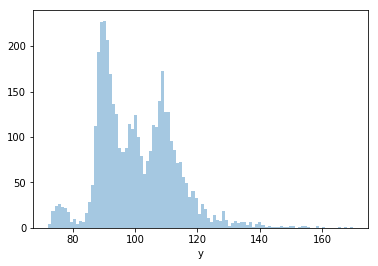

In [6]:
sns.distplot(y_train[y_train<170],bins=100,kde=False)

C:\Users\Pink\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


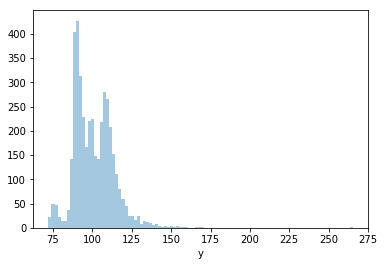

In [7]:
sns.distplot(y_train,bins=100,kde=False)

In [8]:
class cluster_target_encoder:
    def make_encoding(self,df):
        self.encoding = df.groupby('X')['y'].mean()
    def fit(self,X,y):
        df = pd.DataFrame(columns=['X','y'],index=X.index)
        df['X'] = X
        df['y'] = y
        self.make_encoding(df)
        clust = KMeans(4,random_state=0)
        labels = clust.fit_predict(self.encoding[df['X'].values].values.reshape(-1,1))
        df['labels'] = labels
        self.clust_encoding = df.groupby('X')['labels'].median()
    def transform(self,X):
        res = X.map(self.clust_encoding).astype(float)
        return res
    def fit_transform(self,X,y):
        self.fit(X,y)
        return self.transform(X)

In [9]:
enc1 = cluster_target_encoder()
labels_train = enc1.fit_transform(X_train['X0'],train['y'])
labels_train.head()

0    3.0
1    3.0
2    2.0
3    2.0
4    2.0
Name: X0, dtype: float64

In [10]:
encoding1 = train.groupby('X0')['y'].mean()
clust1 = KMeans(4,random_state=0)
labels1 = clust1.fit_predict(encoding1[train['X0'].values].values.reshape(-1,1))

In [11]:
ddf=pd.concat([pd.DataFrame(labels1),train['X0'],train['y']],axis=1)

In [12]:
ddf.head(20)

,0,X0,y
0,3,k,130.81
1,3,k,88.53
2,2,az,76.26
3,2,az,80.62
4,2,az,78.02
5,1,t,92.93
6,1,al,128.76
7,1,o,91.91
8,0,w,108.67
9,0,j,126.99


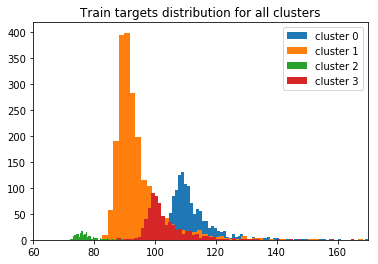

In [13]:
#plt.figure(figsize(10,5))
plt.hist(y_train.values[ddf[0]==0],bins=70,label='cluster 0')
plt.hist(y_train.values[ddf[0]==1],bins=100,label='cluster 1')
plt.hist(y_train.values[ddf[0]==2],bins=70,label='cluster 2')
plt.hist(y_train.values[ddf[0]==3],bins=70,label='cluster 3')
plt.legend()
plt.title('Train targets distribution for all clusters')
plt.xlim((60,170))
plt.show()

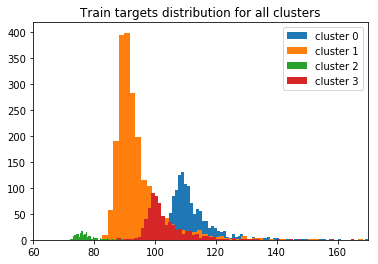

In [14]:
#plt.figure(figsize(10,5))
plt.hist(y_train.values[labels_train==0],bins=70,label='cluster 0')
plt.hist(y_train.values[labels_train==1],bins=100,label='cluster 1')
plt.hist(y_train.values[labels_train==2],bins=70,label='cluster 2')
plt.hist(y_train.values[labels_train==3],bins=70,label='cluster 3')
plt.legend()
plt.title('Train targets distribution for all clusters')
plt.xlim((60,170))
plt.show()

In [15]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score,cross_val_predict

In [16]:
cross_val_score(
    X = X_train.select_dtypes(include=[np.number]),
    y = labels_train,
    estimator = xgb.XGBClassifier(),
    cv = 10,
    scoring = 'accuracy')

array([0.9929078, 1.       , 1.       , 1.       , 1.       , 0.9976247,
       1.       , 1.       , 1.       , 1.       ])

In [17]:
train['X4'].value_counts()

d    4205
a       2
b       1
c       1
Name: X4, dtype: int64

In [18]:
if 'X4' in X_train.columns.values:
    X_train = X_train.drop('X4',axis=1)
if 'X4' in X_test.columns.values:
    X_test = X_test.drop('X4',axis=1)

In [19]:
from scipy import stats

different_cols = []
for c in X_train.select_dtypes(include=[np.number]).columns:
    tt = stats.ttest_ind(X_train[c],test[c])
    if tt[1]<0.05:
        different_cols.append(c)

In [20]:
different_cols

['X10', 'X26', 'X44', 'X79', 'X97', 'X105', 'X229', 'X258', 'X302', 'X305']

In [21]:
print(stats.ttest_ind(X_train['X10'],test['X10']))
print(stats.ttest_ind(X_train['X26'],test['X26']))

Ttest_indResult(statistic=-2.075095612700884, pvalue=0.038007983530353326)
Ttest_indResult(statistic=-2.2213955633122993, pvalue=0.026350685552000187)


In [22]:
print(stats.ttest_ind(X_train['X12'],test['X12']))
print(stats.ttest_ind(X_train['X20'],test['X20']))

Ttest_indResult(statistic=0.12433927833156154, pvalue=0.9010496184672518)
Ttest_indResult(statistic=0.4382364383450817, pvalue=0.6612261445202067)


C:\Users\Pink\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


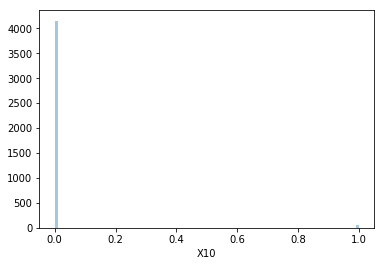

In [23]:
sns.distplot(X_train['X10'],bins=100,kde=False)

In [24]:
## https://blog.goodaudience.com/stacking-ml-algorithm-for-mercedes-benz-greener-manufacturing-competition-5600762186ae
from sklearn.preprocessing import LabelEncoder

for c in X_train.columns:
    if X_train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(X_train[c].values) + list(test[c].values))# Fit label encoder
        X_train[c] = lbl.transform(list(train[c].values))# Transform labels to normalized encoding.
        test[c] = lbl.transform(list(test[c].values))# Transform labels to normalized encoding.